In [9]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

In [10]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


In [11]:
#loading the datasets
x_train = load_data("x_train.csv")
y_train = load_data("y_train.csv")
x_val = load_data("x_val.csv")
y_val = load_data("y_val.csv")

# Convert DataFrames to NumPy arrays and ensure correct data types
# import numpy as np
# x_train = x_train.to_numpy().astype(np.float32)
# y_train = y_train.to_numpy().astype(np.int32)
# x_val = x_val.to_numpy().astype(np.float32)
# y_val = y_val.to_numpy().astype(np.int32)

In [12]:
save_path = '../models'
# Setting up hyperparameters
batch_size = 128
epochs = 256
optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [13]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics)

In [14]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

Epoch 1/256
4/4 [==============================] - 1s 45ms/step - loss: 1.4728 - accuracy: 0.5587 - val_loss: 0.7175 - val_accuracy: 0.5455
Epoch 2/256
4/4 [==============================] - 0s 13ms/step - loss: 0.7441 - accuracy: 0.6244 - val_loss: 0.7183 - val_accuracy: 0.5524
Epoch 3/256
4/4 [==============================] - 0s 14ms/step - loss: 0.7002 - accuracy: 0.5141 - val_loss: 0.6903 - val_accuracy: 0.5734
Epoch 4/256
4/4 [==============================] - 0s 14ms/step - loss: 0.6921 - accuracy: 0.6268 - val_loss: 0.6913 - val_accuracy: 0.5664
Epoch 5/256
4/4 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.5446 - val_loss: 0.6696 - val_accuracy: 0.6434
Epoch 6/256
4/4 [==============================] - 0s 14ms/step - loss: 0.6743 - accuracy: 0.6338 - val_loss: 0.7159 - val_accuracy: 0.5524
Epoch 7/256
4/4 [==============================] - 0s 15ms/step - loss: 0.6869 - accuracy: 0.6174 - val_loss: 0.6794 - val_accuracy: 0.5664
Epoch 8/256
4/4 [===

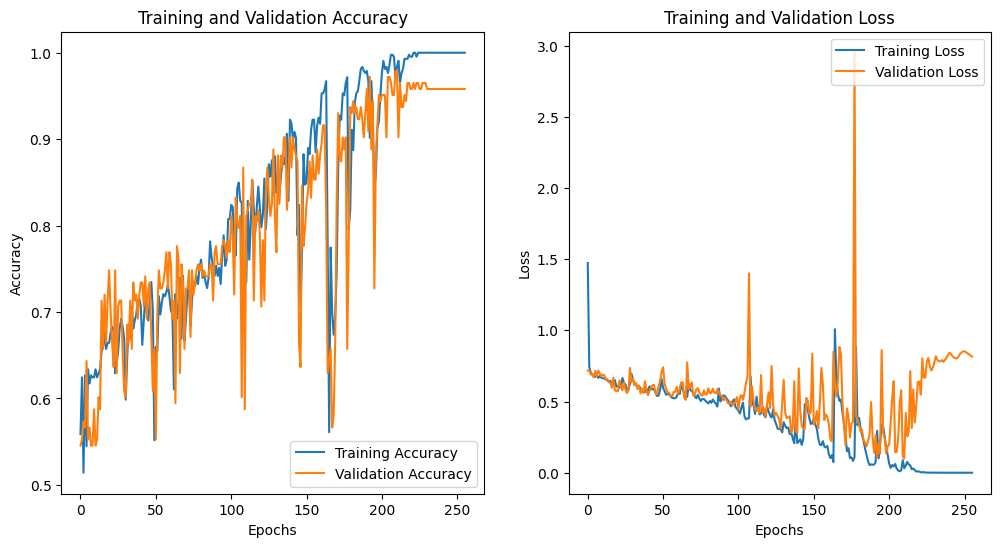

In [15]:
# Get predictions on the training data
plot_training_history(history)

In [16]:
# Saving the model
save_model(model, save_path)

INFO:tensorflow:Assets written to: ../models/assets
